Study the decision tree algorithm, focusing on both entropy based information gain and Gini index for splitting. Build decision trees and random forests for the loan datasets.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
loan_df = pd.read_excel('loan.xlsx')

In [4]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429 entries, 0 to 428
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Sex              429 non-null    object 
 1   Age              429 non-null    float64
 2   Time_at_address  429 non-null    float64
 3   Res_status       429 non-null    object 
 4   Telephone        429 non-null    object 
 5   Occupation       429 non-null    object 
 6   Job_status       429 non-null    object 
 7   Time_employed    429 non-null    int64  
 8   Time_bank        429 non-null    int64  
 9   Liab_ref         429 non-null    object 
 10  Acc_ref          429 non-null    object 
 11  Home_Expn        429 non-null    int64  
 12  Balance          429 non-null    int64  
 13  Decision         429 non-null    object 
dtypes: float64(2), int64(4), object(8)
memory usage: 47.0+ KB


In [5]:
loan_df.columns

Index(['Sex', 'Age', 'Time_at_address', 'Res_status', 'Telephone',
       'Occupation', 'Job_status', 'Time_employed', 'Time_bank', 'Liab_ref',
       'Acc_ref', 'Home_Expn', 'Balance', 'Decision'],
      dtype='object')

**As the loan dataset has categorical columns so performing chi square test to check the relation among the columns**

In [6]:
from scipy.stats import chi2_contingency

In [7]:
loan_chi_dict = {}

In [8]:
feature_cat_columns = list(loan_df.columns) 
for item in ['Decision', 'Balance', 'Home_Expn', 'Time_bank', 'Time_employed', 'Time_at_address', 'Age']:
    feature_cat_columns.remove(item)

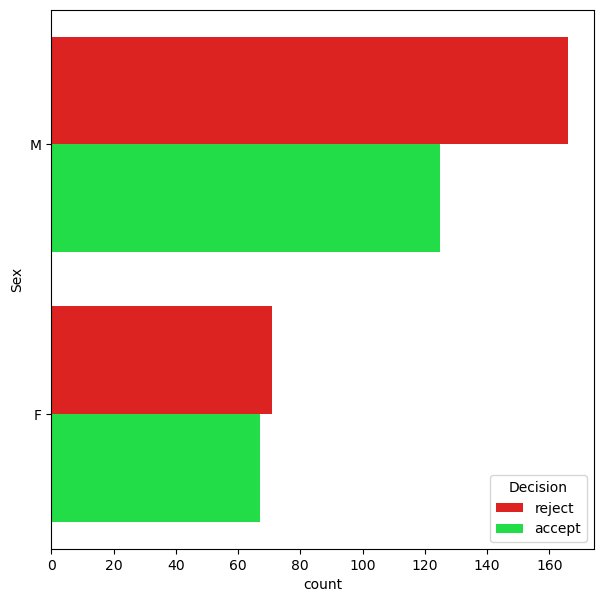

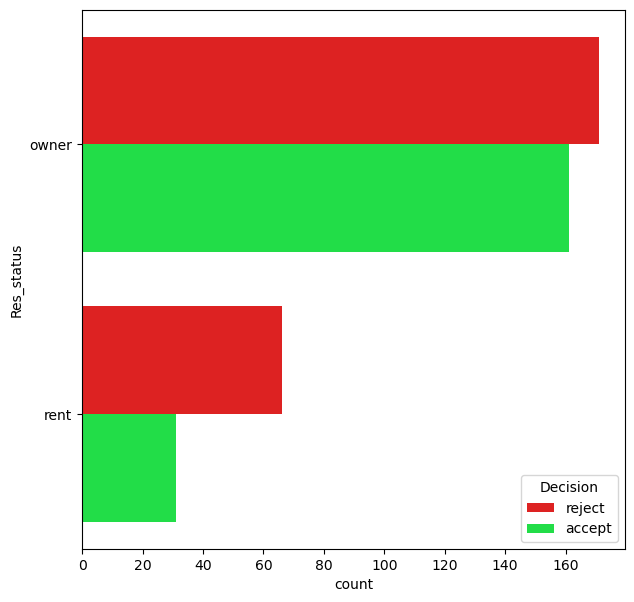

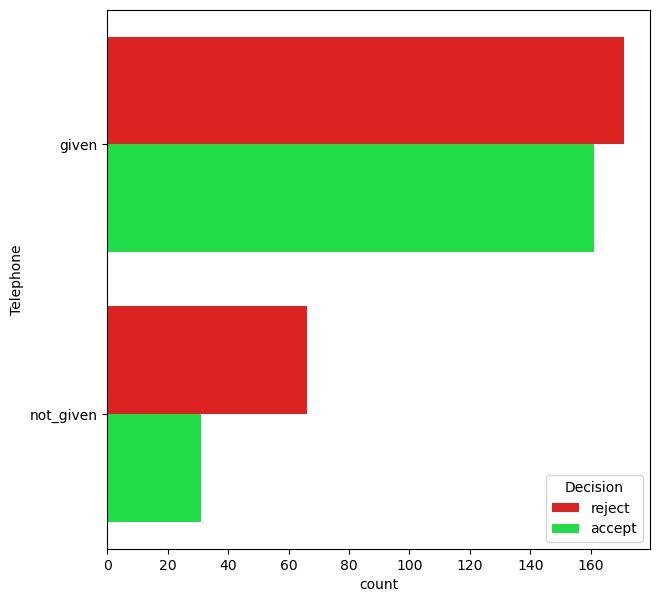

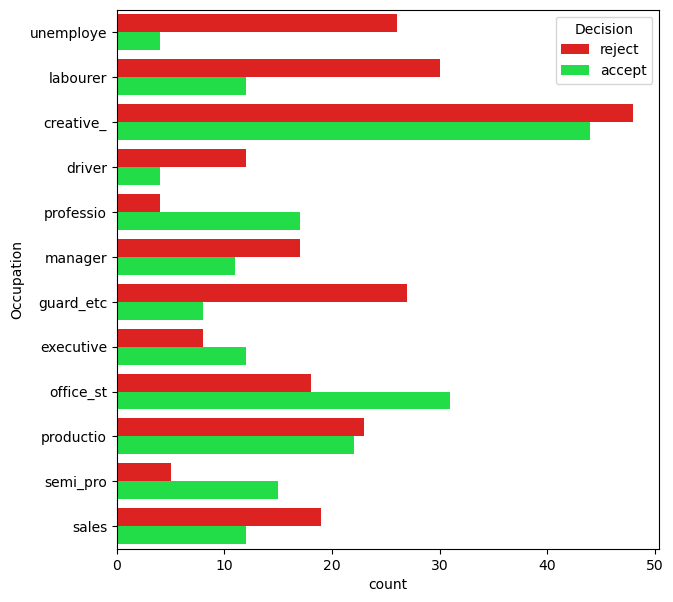

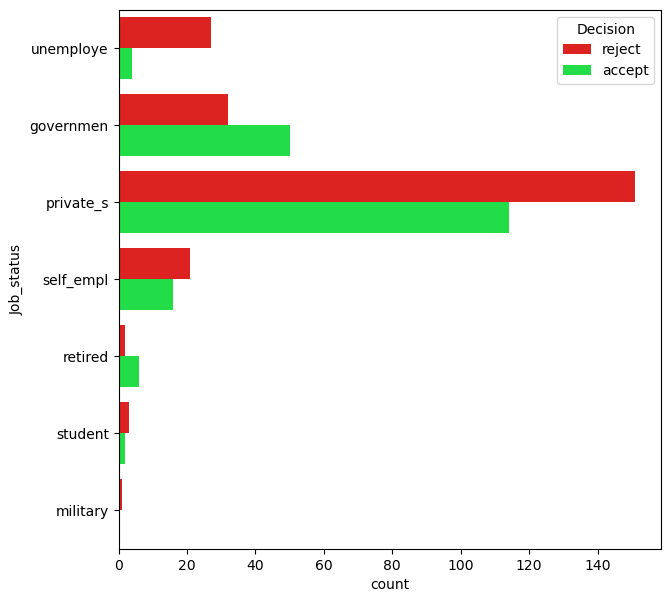

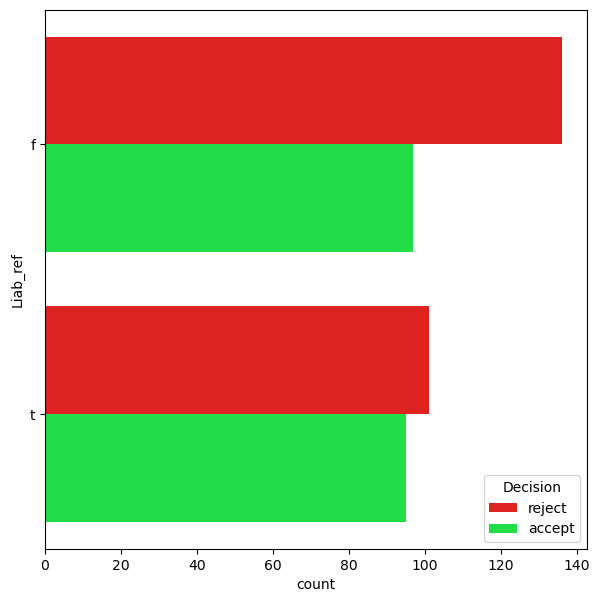

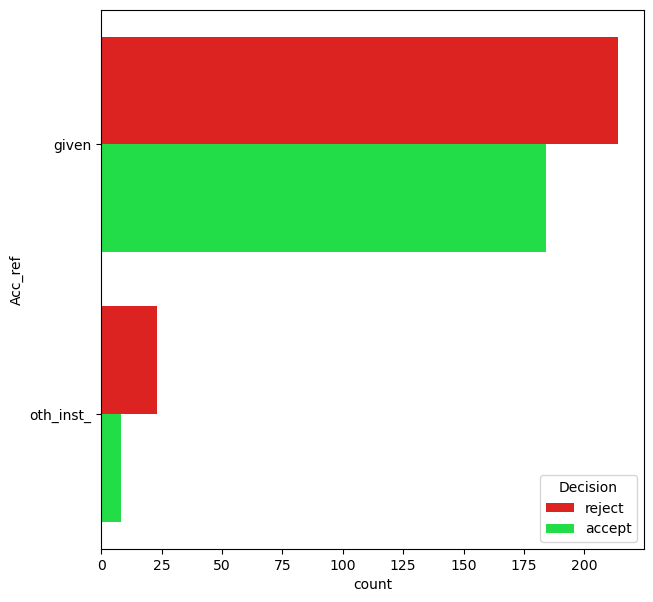

In [9]:
for featureColumns in feature_cat_columns:
    crosstab = pd.crosstab(loan_df[featureColumns], loan_df['Decision'])
    plt.figure(figsize=(7,7))
    sns.countplot(data=loan_df, y=loan_df[featureColumns], hue="Decision", palette=['#fc0303',"#03fc35"])
    loan_chi_dict[featureColumns] = chi2_contingency(crosstab)[1]
    
#plot the countplot of the decisions for every categorical columns 


**Plotting a barplot between categorical columns and their p-values**

In [10]:
catFeatures = list(loan_chi_dict.keys())

In [11]:
catPValues = list(loan_chi_dict.values())

[Text(0.5, 1.0, 'Bar plot between categorical columns and their respective p-values')]

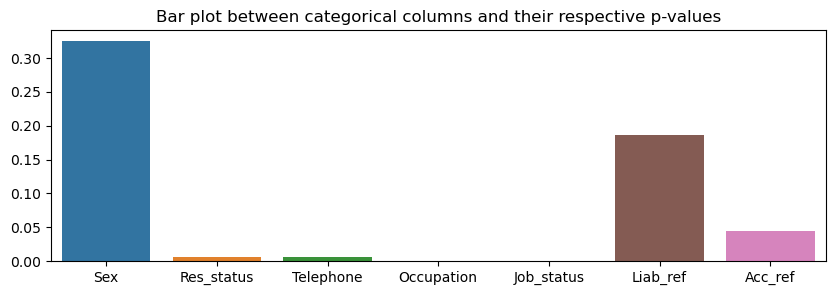

In [12]:
plt.figure(figsize=(10,3))
sns.barplot(x=catFeatures, y=catPValues).set(title='Bar plot between categorical columns and their respective p-values')

**Performing one hot encoding for the categorical columns to get respective continuous values as scikit learn's DecisionTree model doesn't permit categorical values**

In [13]:
#Feature column: Sex
Sex = pd.get_dummies(loan_df['Sex'], drop_first=True, prefix='sex')
#Feature column: Res_status
Res_status = pd.get_dummies(loan_df['Res_status'], drop_first=True, prefix='res_status')
#Feature column: Telephone
Telephone = pd.get_dummies(loan_df['Telephone'], drop_first=True, prefix='telephone')
#Feature column: Occupation
Occupation = pd.get_dummies(loan_df['Occupation'], drop_first=True, prefix='occupation')
#Feature column: Job_status
Job_status = pd.get_dummies(loan_df['Job_status'], drop_first=True, prefix='job_status')
#Feature column: Liab_ref
Liab_ref = pd.get_dummies(loan_df['Liab_ref'], drop_first=True, prefix='liab_ref')
#Feature column: Acc_ref
Acc_ref = pd.get_dummies(loan_df['Acc_ref'], drop_first=True, prefix='acc_ref')
#Feature column: Decision
Decision =  pd.get_dummies(loan_df['Decision'], drop_first=True, prefix='decision')

loan_df.drop(['Sex', 'Res_status', 'Telephone', 'Occupation',
                  'Job_status', 'Liab_ref', 'Acc_ref', 'Decision'], axis=1, inplace=True)

loan_df = pd.concat([loan_df, Sex, Res_status, Telephone, Occupation, Job_status, Liab_ref, Acc_ref, Decision], axis=1)

In [14]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429 entries, 0 to 428
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   429 non-null    float64
 1   Time_at_address       429 non-null    float64
 2   Time_employed         429 non-null    int64  
 3   Time_bank             429 non-null    int64  
 4   Home_Expn             429 non-null    int64  
 5   Balance               429 non-null    int64  
 6   sex_M                 429 non-null    uint8  
 7   res_status_rent       429 non-null    uint8  
 8   telephone_not_given   429 non-null    uint8  
 9   occupation_driver     429 non-null    uint8  
 10  occupation_executive  429 non-null    uint8  
 11  occupation_guard_etc  429 non-null    uint8  
 12  occupation_labourer   429 non-null    uint8  
 13  occupation_manager    429 non-null    uint8  
 14  occupation_office_st  429 non-null    uint8  
 15  occupation_productio  4

**Performing the correlation check between the continuous columns and the output columns**

**Preparing data for training and testing**

In [16]:
X = loan_df.drop(['decision_reject'], axis=1)
y = loan_df['decision_reject']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [17]:
from sklearn.tree import DecisionTreeClassifier
loan_tree = DecisionTreeClassifier(criterion='entropy', random_state=0)

loan_tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [18]:
LoanPredictions = loan_tree.predict(X_test)

In [19]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, LoanPredictions, target_names=['accept', 'reject']))
# print(confusion_matrix(y_test, LoanPredictions))

              precision    recall  f1-score   support

      accept       0.59      0.65      0.62        57
      reject       0.70      0.64      0.67        72

    accuracy                           0.64       129
   macro avg       0.64      0.64      0.64       129
weighted avg       0.65      0.64      0.64       129



**As we can see the accuracy 64% for now we plot the decision tree later we will perform pruning to improve accuracy**

In [54]:
from sklearn import tree

features = list(X.columns)
classes = ['accept', 'reject']
plt.figure(figsize=(125, 125))
tree.plot_tree(loan_tree, filled=True, feature_names=features, class_names=classes)


[Text(0.7134433962264151, 0.9615384615384616, 'Time_bank <= 2.5\nentropy = 0.993\nsamples = 300\nvalue = [135, 165]\nclass = reject'),
 Text(0.5306603773584906, 0.8846153846153846, 'Time_employed <= 3.5\nentropy = 0.883\nsamples = 219\nvalue = [66, 153]\nclass = reject'),
 Text(0.38207547169811323, 0.8076923076923077, 'Balance <= 264.0\nentropy = 0.815\nsamples = 194\nvalue = [49, 145]\nclass = reject'),
 Text(0.2358490566037736, 0.7307692307692307, 'occupation_labourer <= 0.5\nentropy = 0.665\nsamples = 150\nvalue = [26, 124]\nclass = reject'),
 Text(0.2169811320754717, 0.6538461538461539, 'Age <= 18.75\nentropy = 0.719\nsamples = 131\nvalue = [26, 105]\nclass = reject'),
 Text(0.19811320754716982, 0.5769230769230769, 'entropy = 0.0\nsamples = 14\nvalue = [0, 14]\nclass = reject'),
 Text(0.2358490566037736, 0.5769230769230769, 'Age <= 30.71\nentropy = 0.764\nsamples = 117\nvalue = [26, 91]\nclass = reject'),
 Text(0.1509433962264151, 0.5, 'Balance <= 0.5\nentropy = 0.881\nsamples = 70

In [21]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [22]:
import graphviz

TreeClfData = tree.export_graphviz(loan_tree, out_file=None, 
                      feature_names=features,  
                      class_names=classes,  
                      filled=True, rounded=True,  
                      special_characters=True)  
LoanGraph = graphviz.Source(TreeClfData)  
LoanGraph 
LoanGraph.render(filename='graph.png')

'graph.png.pdf'

In [55]:
loan_tree.tree_.max_depth

12

**As we can see the distance from the top node to the leaf node of the tree is very long, the depth of tree is 12 which is not the best split. So now we will perform pruning to select a tree on the criterion = 'entropy' having the maximum Information Gain**

In [24]:
path = loan_tree.cost_complexity_pruning_path(X_train, y_train)
loan_tree_ccp_alphas = path.ccp_alphas
loan_tree_impurities = path.impurities

In [25]:
loan_clfs = []
for loan_tree_ccp_alpha in loan_tree_ccp_alphas:
    loan_clf = DecisionTreeClassifier(criterion='entropy', ccp_alpha=loan_tree_ccp_alpha, random_state=0)
    loan_clf.fit(X_train, y_train)
    loan_clfs.append(loan_clf)


**Plot between accuracy and alpha values for training and testing data sets**

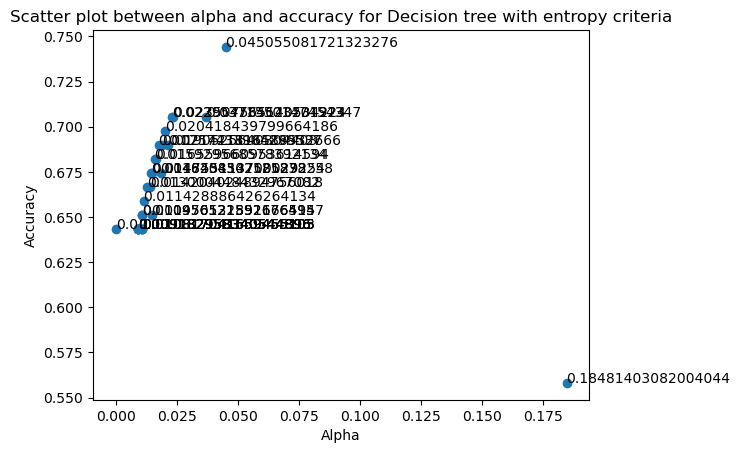

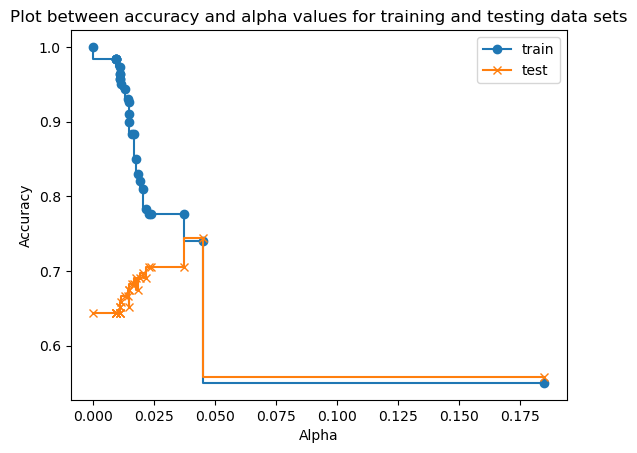

In [26]:
train_scores = [loan_clf.score(X_train, y_train) for loan_clf in loan_clfs]
test_scores = [loan_clf.score(X_test, y_test) for loan_clf in loan_clfs]

# print(loan_tree_ccp_alphas)
# print(test_scores)

plt.scatter(x=loan_tree_ccp_alphas, y=test_scores)
plt.xlabel('Alpha')
plt.ylabel('Accuracy')
plt.title('Scatter plot between alpha and accuracy for Decision tree with entropy criteria')

for i in range(len(test_scores)):
    plt.annotate(loan_tree_ccp_alphas[i], (loan_tree_ccp_alphas[i], test_scores[i]))
    

fig, axes = plt.subplots()
axes.set_xlabel('Alpha')
axes.set_ylabel('Accuracy')
axes.set_title('Plot between accuracy and alpha values for training and testing data sets')
axes.plot(loan_tree_ccp_alphas, train_scores, marker='o', label='train', drawstyle='steps-pre')
axes.plot(loan_tree_ccp_alphas, test_scores, marker='x', label='test', drawstyle='steps-pre' )
axes.legend()
plt.show()

**As we can see from the above plot that increase in alpha decreases the accuracy.
Cost Complexity Pruning provides option to control the size of the tree. Greater ccp_alpha values increases the number of nodes pruned and its not necessarily true that it will increase accuracy, as we can infer from the above plot**

**I have selected ccp_alpha as 0.05568812 where the accuracy is close to 64%, and lets plot the tree and see whether we get minimized tree or not.**

In [27]:

loan_tree_clf = DecisionTreeClassifier(random_state=0, criterion='entropy', ccp_alpha=0.05568812)

loan_tree_clf.fit(X_train, y_train)
loan_tree_pred = loan_tree_clf.predict(X_test)

print('score', loan_tree_clf.score(X_test, y_test))

from sklearn.metrics import accuracy_score

print(accuracy_score(loan_tree_pred, y_test))

print(classification_report(y_test, loan_tree_pred, target_names=['accept', 'reject']))

score 0.7441860465116279
0.7441860465116279
              precision    recall  f1-score   support

      accept       0.90      0.47      0.62        57
      reject       0.70      0.96      0.81        72

    accuracy                           0.74       129
   macro avg       0.80      0.72      0.71       129
weighted avg       0.79      0.74      0.72       129



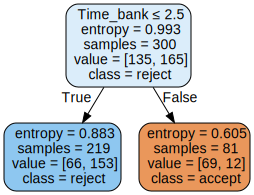

In [28]:
TreeClfData = tree.export_graphviz(loan_tree_clf, out_file=None, 
                      feature_names=features,  
                      class_names=classes,  
                      filled=True, rounded=True,  
                      special_characters=True)  
LoanGraph = graphviz.Source(TreeClfData)  
LoanGraph 

[Text(0.5, 1.0, 'Feature importance in the decision tree with entropy criterion')]

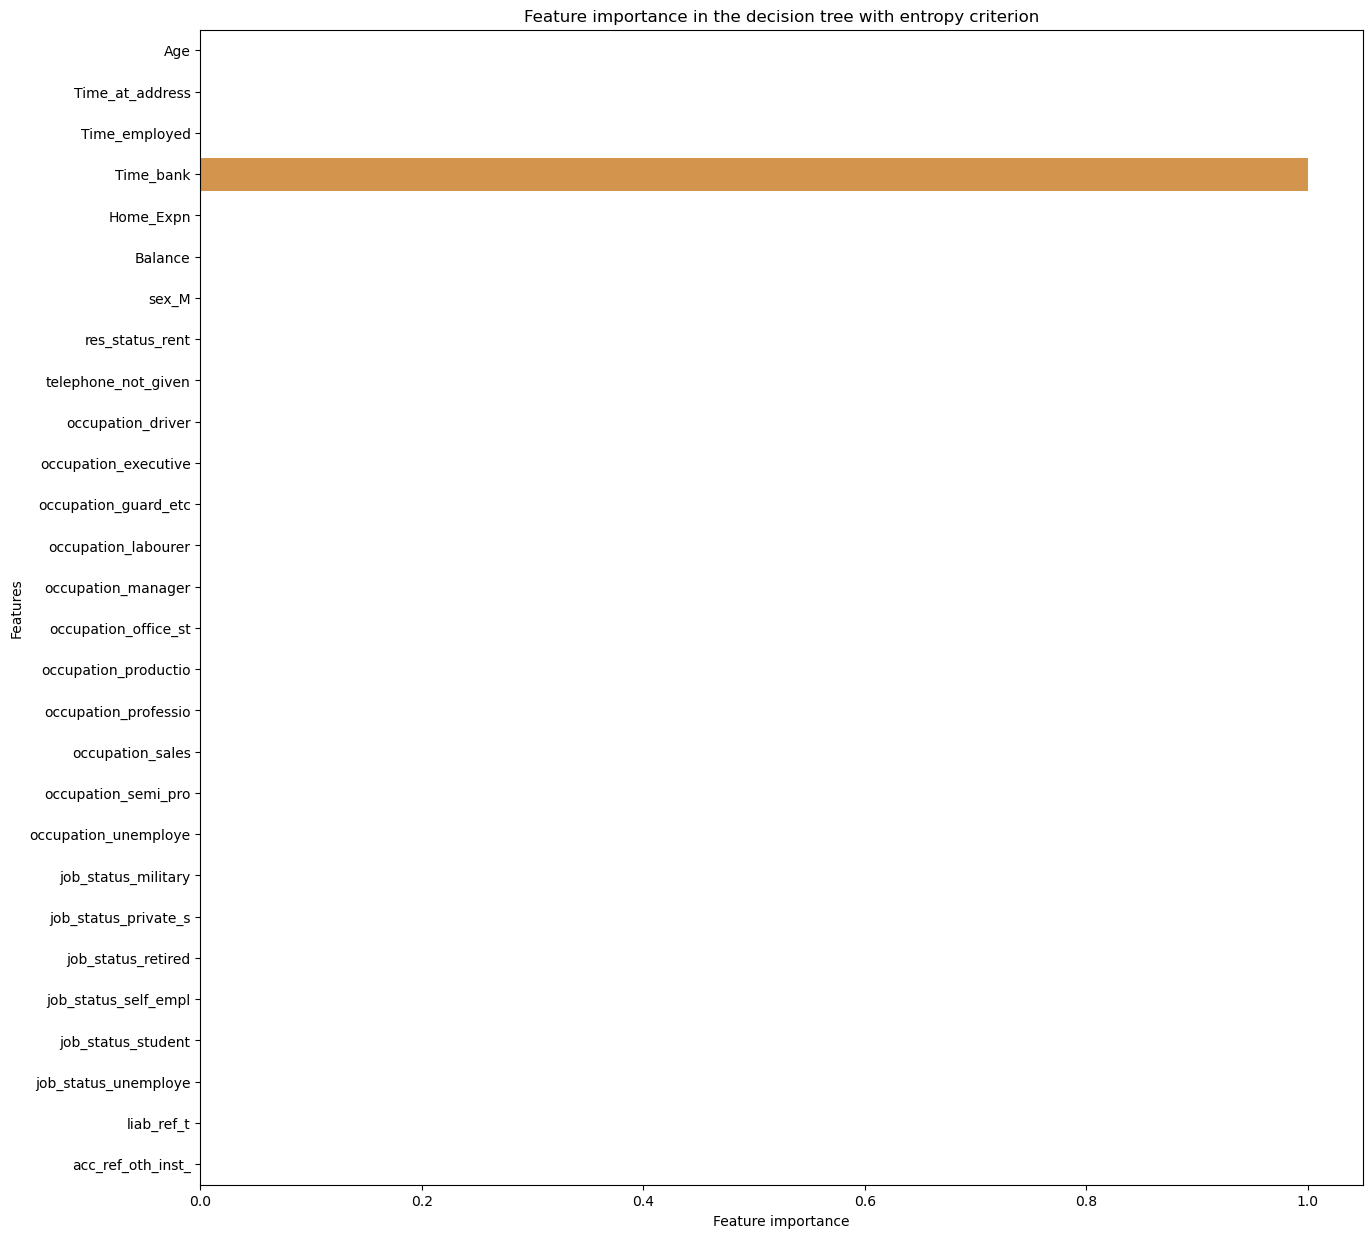

In [29]:
loan_tree_features_dict = {'Feature importance': loan_tree_clf.feature_importances_,
                             'Features': list(X.columns)}
loan_tree_features_df = pd.DataFrame(loan_tree_features_dict)

plt.figure(figsize=(15,15))
sns.barplot(data=loan_tree_features_df, y='Features', x='Feature importance').set(
    title='Feature importance in the decision tree with entropy criterion')

**Till now we were using Entropy criterion for splitting the tree lets use Gini criterion for the split.**

In [30]:
loan_tree_gini = DecisionTreeClassifier(criterion='gini', random_state=0)

loan_tree_gini.fit(X_train, y_train)
loan_gini_predictions = loan_tree_gini.predict(X_test)

print(classification_report(y_test, loan_gini_predictions, target_names=['accept', 'reject']))

              precision    recall  f1-score   support

      accept       0.68      0.67      0.67        57
      reject       0.74      0.75      0.74        72

    accuracy                           0.71       129
   macro avg       0.71      0.71      0.71       129
weighted avg       0.71      0.71      0.71       129



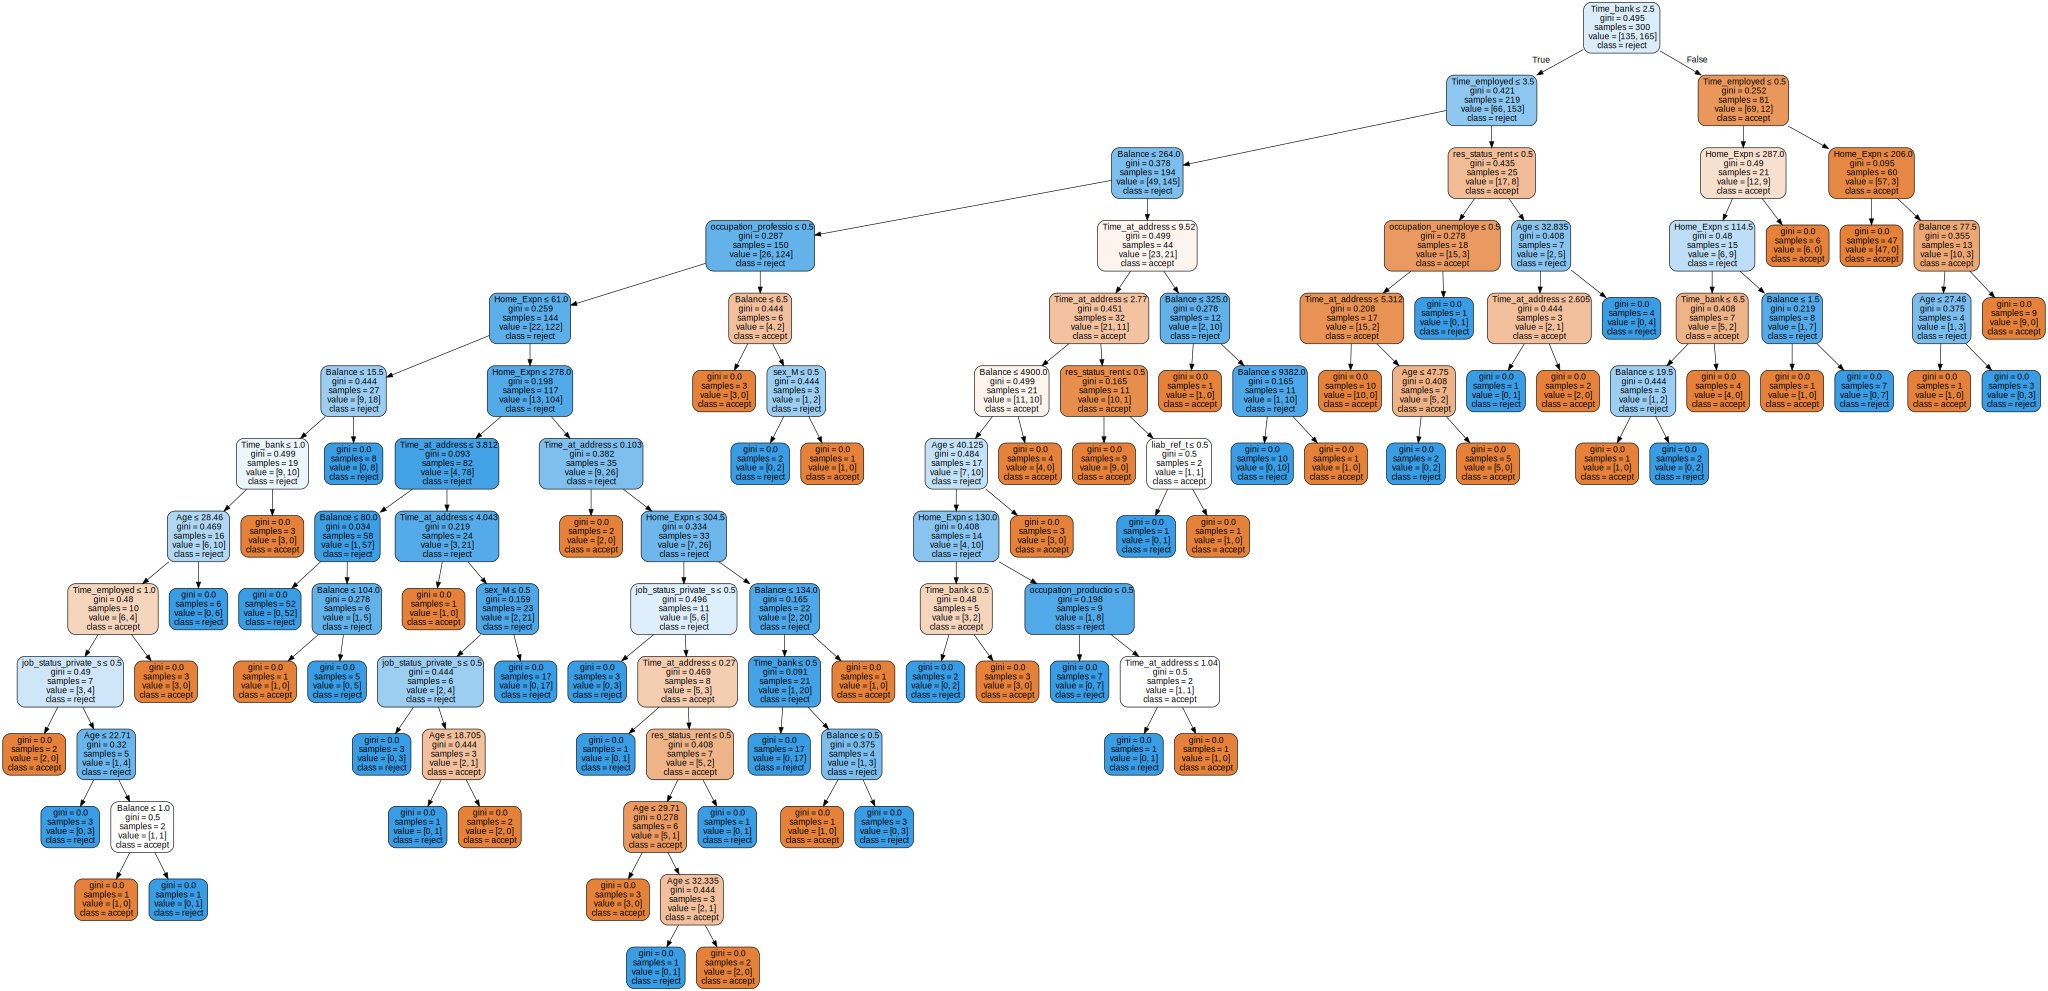

In [31]:
loan_gini_data = tree.export_graphviz(loan_tree_gini, out_file=None, 
                      feature_names=features,  
                      class_names=classes,  
                      filled=True, rounded=True,  
                      special_characters=True)  
loan_gini_graph = graphviz.Source(loan_gini_data)  
loan_gini_graph 

**The depth of tree is still huge we can use Cost complexity pruning to prune the tree**

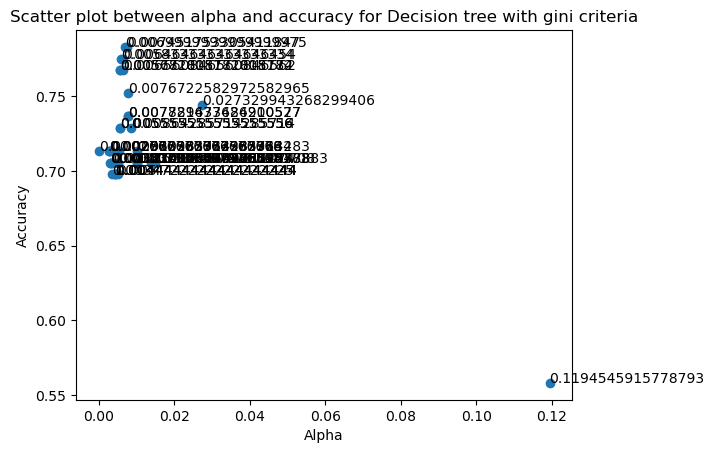

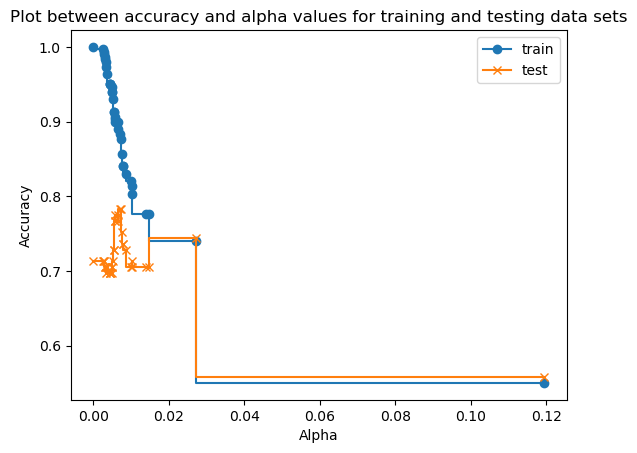

In [32]:
gini_path = loan_tree_gini.cost_complexity_pruning_path(X_train, y_train)
loan_gini_ccp_alphas = gini_path.ccp_alphas
loan_gini_impurities = gini_path.impurities

loan_gini_clfs = []
for loan_gini_ccp_alpha in loan_gini_ccp_alphas:
    loan_gini_clf = DecisionTreeClassifier(criterion='gini', ccp_alpha=loan_gini_ccp_alpha, random_state=0)
    loan_gini_clf.fit(X_train, y_train)
    loan_gini_clfs.append(loan_gini_clf)
    
    
train_scores_gini = [loan_gini_clf.score(X_train, y_train) for loan_gini_clf in loan_gini_clfs]
test_scores_gini = [loan_gini_clf.score(X_test, y_test) for loan_gini_clf in loan_gini_clfs]

# print(loan_tree_ccp_alphas)
# print(test_scores)

plt.scatter(x=loan_gini_ccp_alphas, y=test_scores_gini)
plt.xlabel('Alpha')
plt.ylabel('Accuracy')
plt.title('Scatter plot between alpha and accuracy for Decision tree with gini criteria')

for i in range(len(test_scores_gini)):
    plt.annotate(loan_gini_ccp_alphas[i], (loan_gini_ccp_alphas[i], test_scores_gini[i]))
    

fig, axes = plt.subplots()
axes.set_xlabel('Alpha')
axes.set_ylabel('Accuracy')
axes.set_title('Plot between accuracy and alpha values for training and testing data sets')
axes.plot(loan_gini_ccp_alphas, train_scores_gini, marker='o', label='train', drawstyle='steps-pre')
axes.plot(loan_gini_ccp_alphas, test_scores_gini, marker='x', label='test', drawstyle='steps-pre' )
axes.legend()
plt.show()

In [33]:
loan_gini_clf = DecisionTreeClassifier(random_state=0, criterion='gini', ccp_alpha=0.009411764705882354)

loan_gini_clf.fit(X_train, y_train)
loan_gini_pred = loan_gini_clf.predict(X_test)

print('score', loan_gini_clf.score(X_test, y_test))

from sklearn.metrics import accuracy_score

print(classification_report(y_test, loan_gini_pred, target_names=['accept', 'reject']))

score 0.7286821705426356
              precision    recall  f1-score   support

      accept       0.71      0.65      0.68        57
      reject       0.74      0.79      0.77        72

    accuracy                           0.73       129
   macro avg       0.73      0.72      0.72       129
weighted avg       0.73      0.73      0.73       129



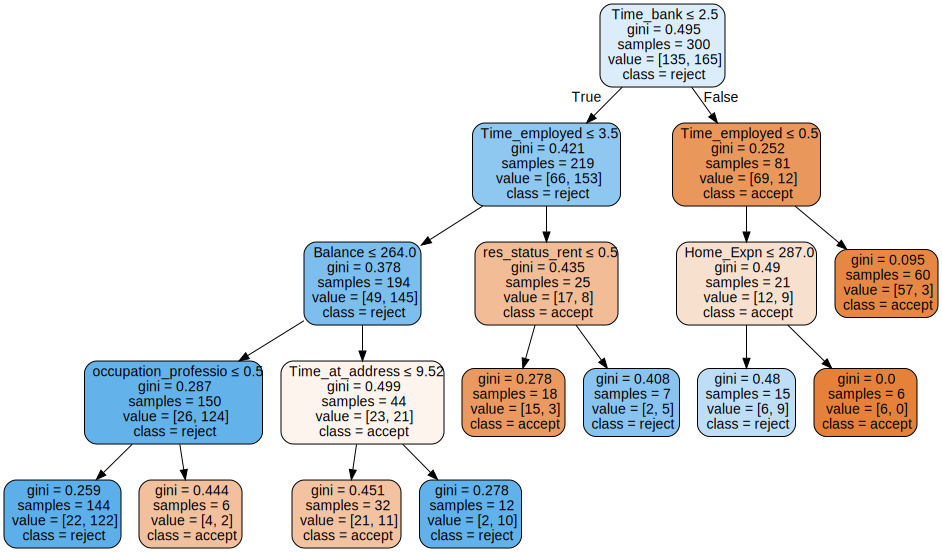

In [34]:
GiniClfData = tree.export_graphviz(loan_gini_clf, out_file=None, 
                      feature_names=features,  
                      class_names=classes,  
                      filled=True, rounded=True,  
                      special_characters=True)  
GiniLoanGraph = graphviz.Source(GiniClfData)  
GiniLoanGraph 

**Above is the tree we get with cost complexity pruning(CCP) and using gini criterion to split the tree.**

Decision tree with gini criteria depth: 4


[Text(0.5, 1.0, 'Feature importance in the decision tree with gini criterion')]

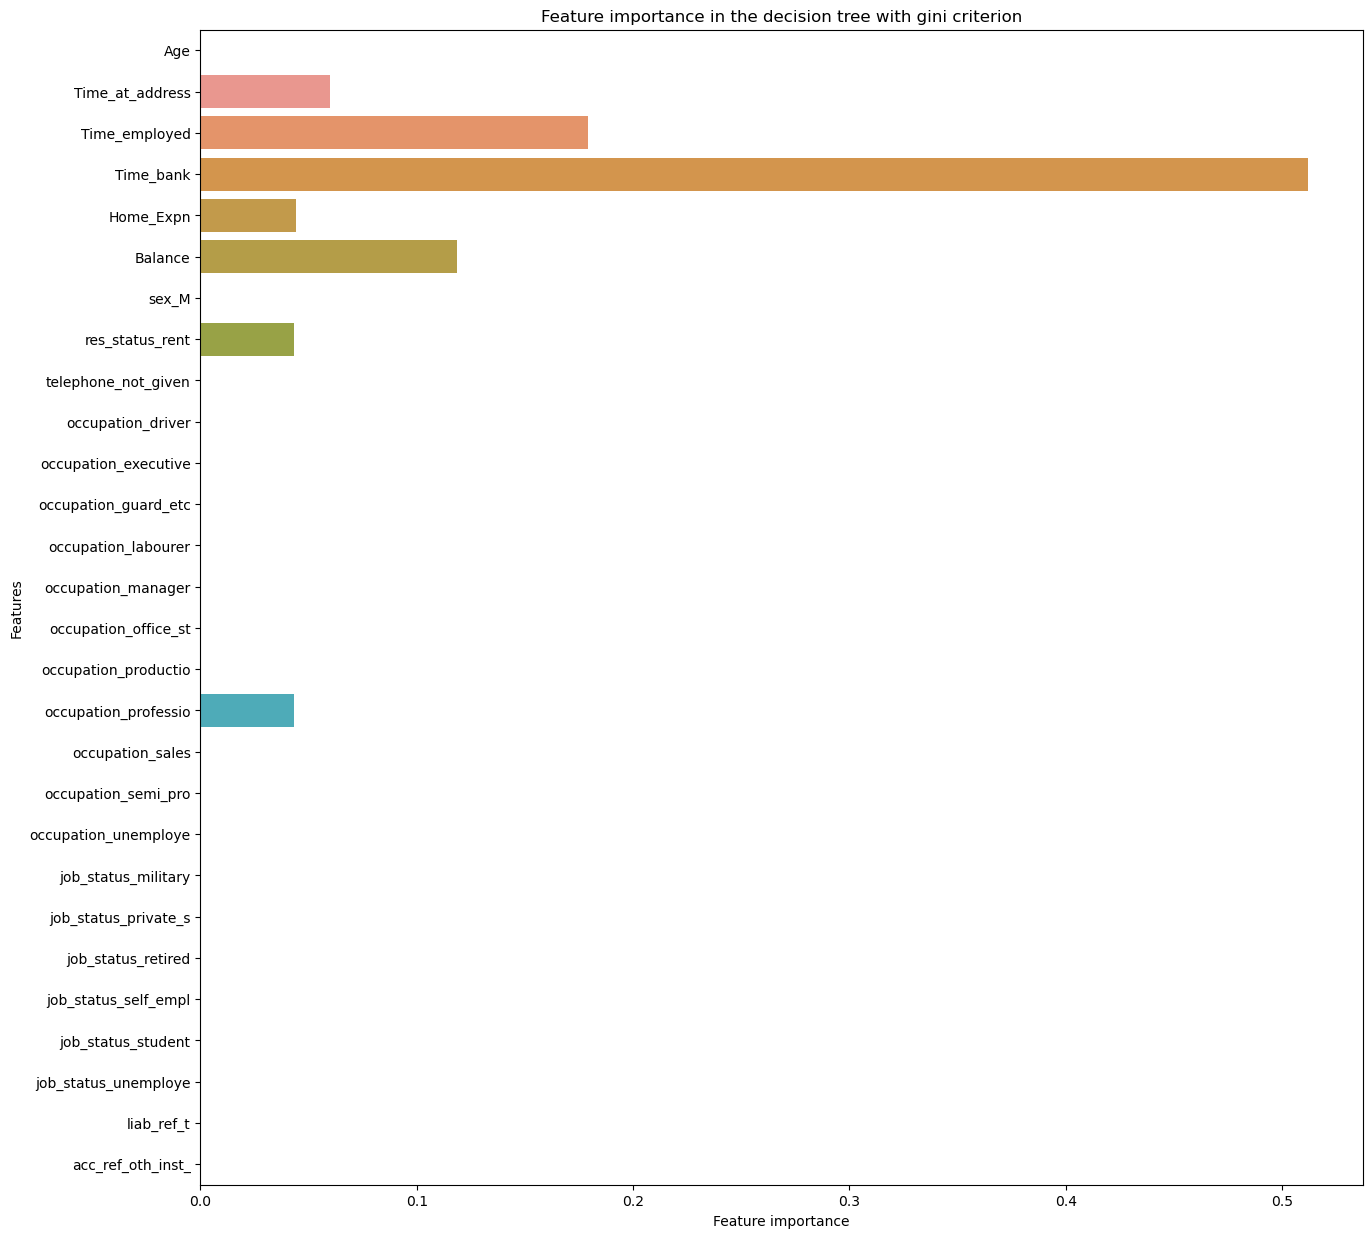

In [35]:
print('Decision tree with gini criteria depth:', loan_gini_clf.tree_.max_depth)

loan_gini_features_dict = {'Feature importance': loan_gini_clf.feature_importances_,
                             'Features': list(X.columns)}
loan_gini_features_df = pd.DataFrame(loan_gini_features_dict)

plt.figure(figsize=(15,15))
sns.barplot(data=loan_gini_features_df, y='Features', x='Feature importance').set(
    title='Feature importance in the decision tree with gini criterion')

In [36]:
from sklearn.ensemble import RandomForestClassifier

In [37]:
rfc_entropy = RandomForestClassifier(n_estimators=100, criterion='entropy')

In [38]:
rfc_entropy.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy')

In [39]:
rfc_entropy_pred = rfc_entropy.predict(X_test)

In [40]:
print(classification_report(y_test, rfc_entropy_pred))

              precision    recall  f1-score   support

           0       0.83      0.68      0.75        57
           1       0.78      0.89      0.83        72

    accuracy                           0.80       129
   macro avg       0.81      0.79      0.79       129
weighted avg       0.80      0.80      0.80       129



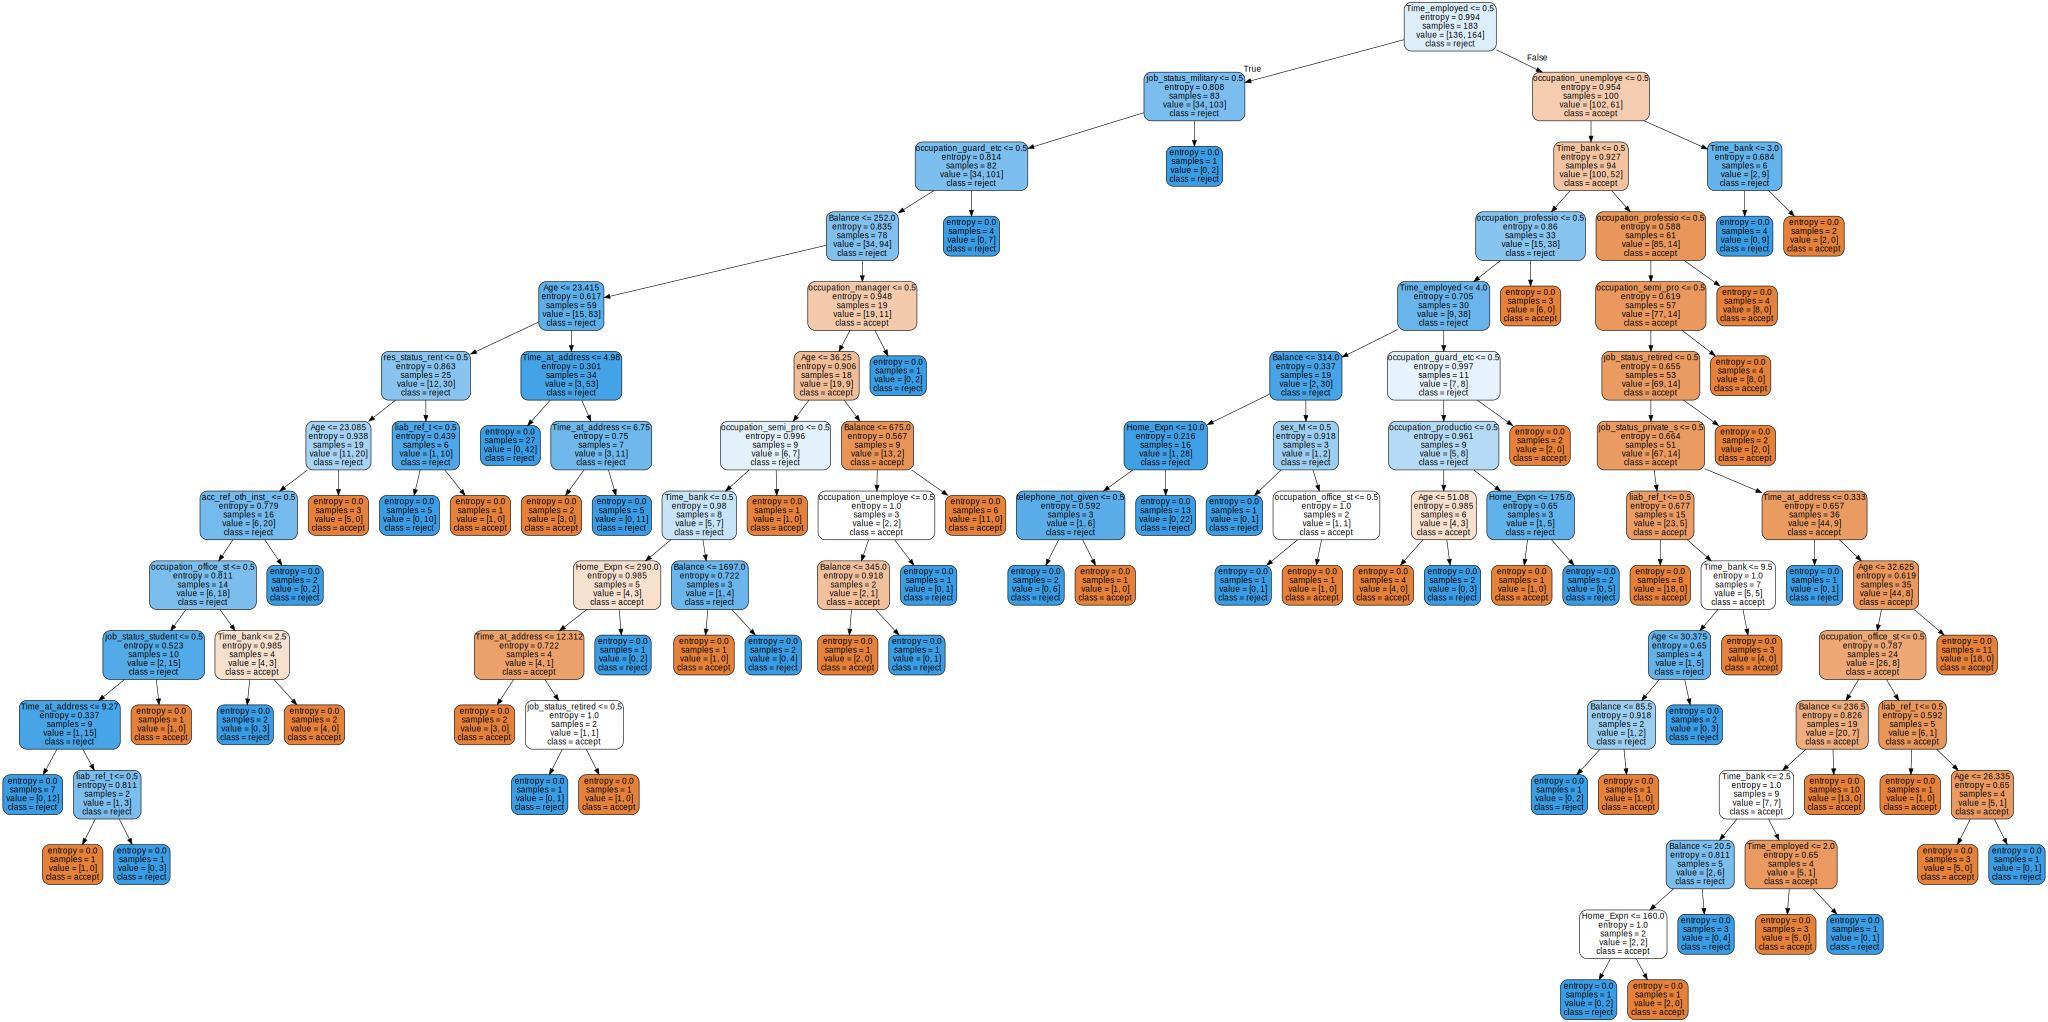

In [41]:
rfc_entropy_data = tree.export_graphviz(rfc_entropy.estimators_[99], out_file=None, 
                                            feature_names=features, class_names=classes, 
                                            filled=True, rounded=True, impurity=True)  
rfc_entropy_graph = graphviz.Source(rfc_entropy_data)  
rfc_entropy_graph 

<AxesSubplot:xlabel='Feature importance', ylabel='Features'>

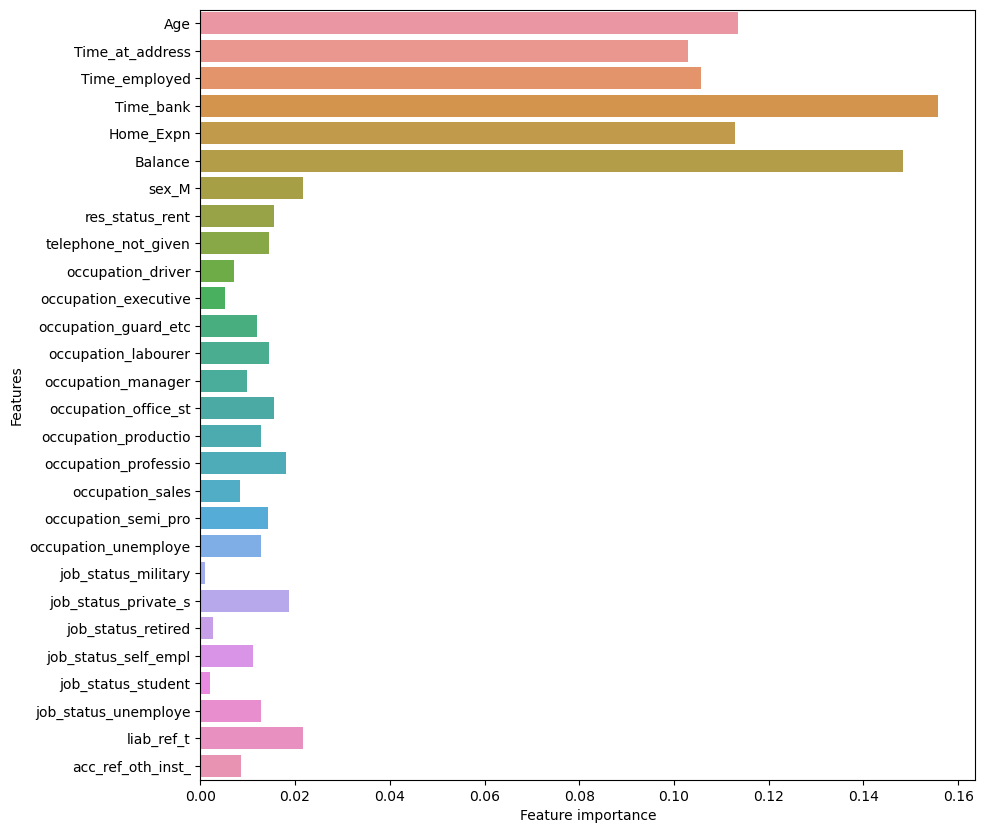

In [42]:
rfc_feat_imp_dict = {
    'Features': list(X.columns),
    'Feature importance': rfc_entropy.feature_importances_
}

plt.figure(figsize=(10,10))
sns.barplot(data=pd.DataFrame(rfc_feat_imp_dict), x='Feature importance', y='Features')

**From the above plot we can infer that the random forest (with 100 estimators) takes into account a lot columns compared to the decision trees**

**From the above analysis we found how the Decision Trees perform under different criteria that is 'Entropy' and 'Gini', we also plotted the feature importance plots to see the importance of each feature column in the tree.**

**From above analysis we can infer that Entropy criteria to split the Decision Trees is computationally intensive, because of the log values in the Entropy's mathematical formula and thus takes longer time compared to Gini criteria which consider the square values of the probabilities and it is not time consuming and thus faster.**

In [43]:
loan_tree_2 = loan_df.drop(['Age', 'Time_at_address', 'Time_employed', 'Time_bank', 'Balance', 'liab_ref_t'], axis=1)

In [44]:
X_cols = loan_tree_2.drop(['decision_reject'], axis=1)
y_cols = loan_tree_2['decision_reject']

In [45]:
loan_dtree_2 = DecisionTreeClassifier(criterion='gini', random_state=0)

In [46]:
X_cols_train, X_cols_test, y_cols_train, y_cols_test = train_test_split(X_cols, y_cols, test_size=0.3, random_state=0)
loan_dtree_2.fit(X_cols_train, y_cols_train)

DecisionTreeClassifier(random_state=0)

In [47]:
loan_dtree_pred_2 = loan_dtree_2.predict(X_cols_test)

In [48]:
print(classification_report(y_test, loan_dtree_pred_2, target_names=['accept', 'reject']))

              precision    recall  f1-score   support

      accept       0.56      0.54      0.55        57
      reject       0.65      0.67      0.66        72

    accuracy                           0.61       129
   macro avg       0.61      0.61      0.61       129
weighted avg       0.61      0.61      0.61       129



**By removing some columns we are getting less accuracy**

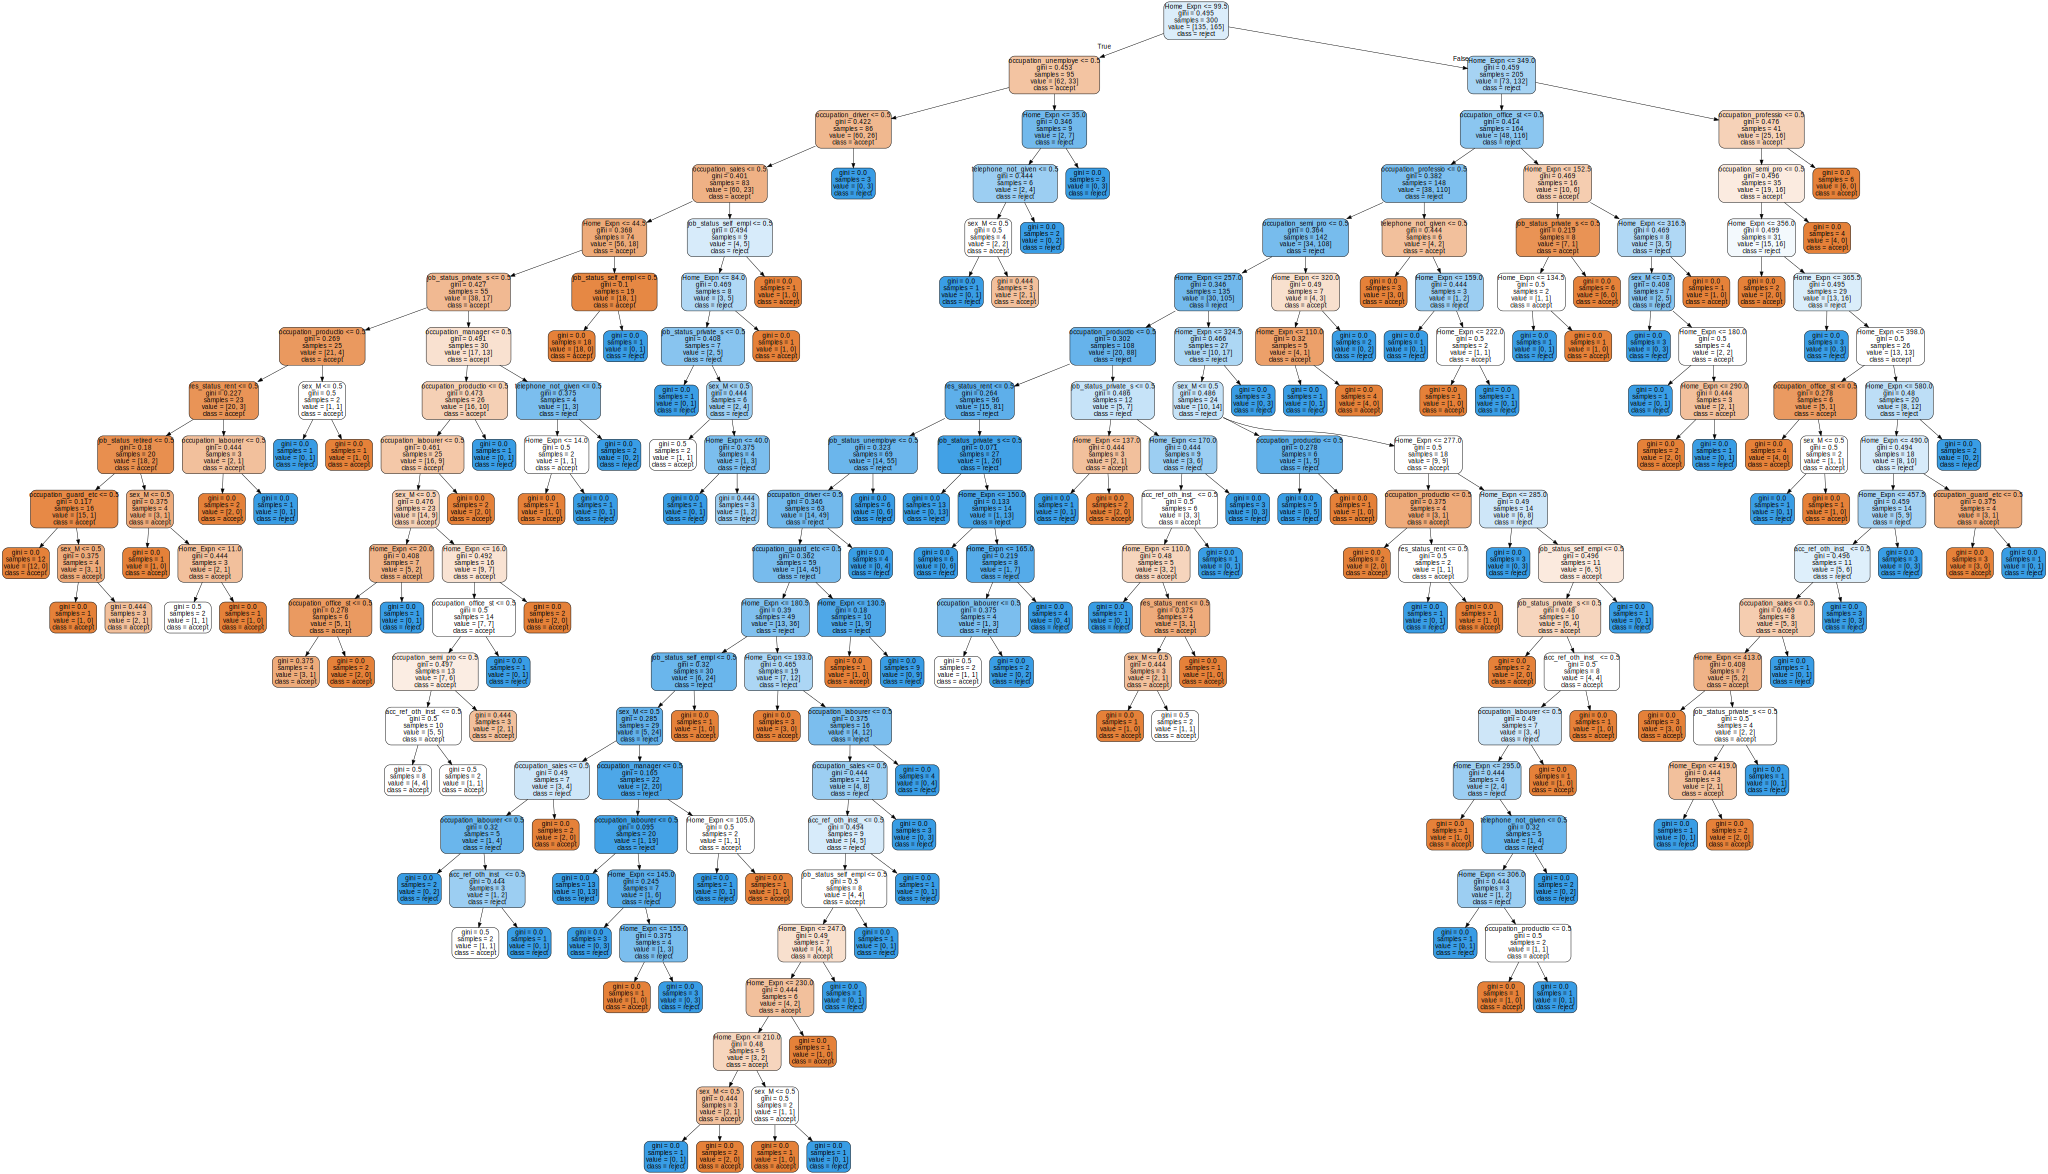

In [49]:
loan_dtree_data = tree.export_graphviz(loan_dtree_2, out_file=None, 
                                            feature_names=list(X_cols.columns), class_names=classes, 
                                            filled=True, rounded=True, impurity=True)  
loan_dtree_graph = graphviz.Source(loan_dtree_data)  
loan_dtree_graph 

In [50]:
loan_dtree_2.tree_.max_depth

21

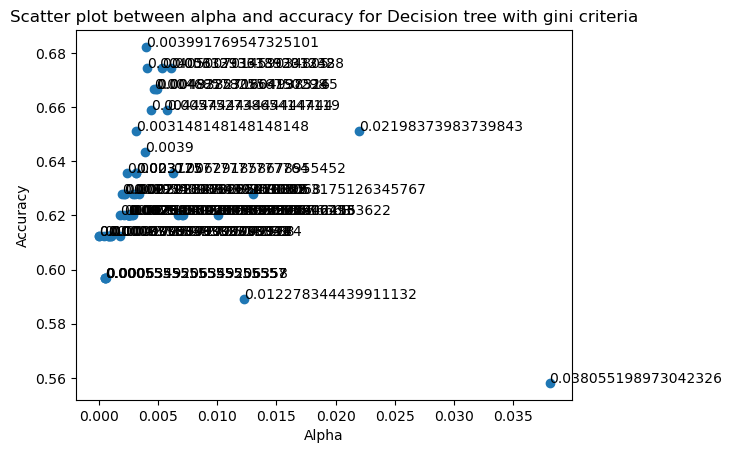

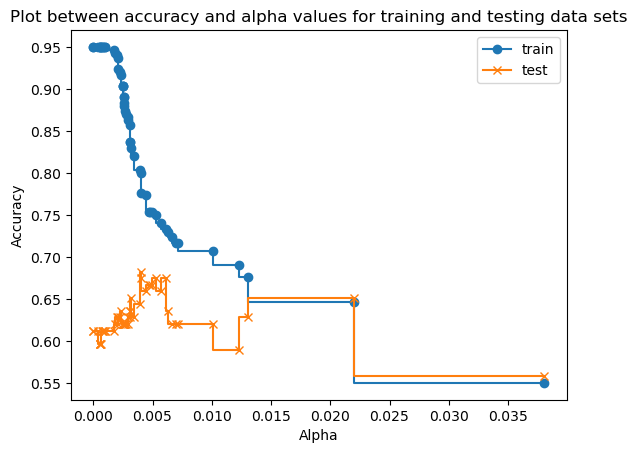

In [51]:
dtree_path_2 = loan_dtree_2.cost_complexity_pruning_path(X_cols_train, y_cols_train)
loan_dtree_ccp_alphas_2 = dtree_path_2.ccp_alphas

loan_dtree_clfs_2 = []
for loan_dtree_ccp_alpha_2 in loan_dtree_ccp_alphas_2:
    loan_dtree_clf_2 = DecisionTreeClassifier(criterion='gini', ccp_alpha=loan_dtree_ccp_alpha_2, random_state=0)
    loan_dtree_clf_2.fit(X_cols_train, y_cols_train)
    loan_dtree_clfs_2.append(loan_dtree_clf_2)
    
    
train_scores_dtree_2 = [loan_dtree_clf_2.score(X_cols_train, y_cols_train) for loan_dtree_clf_2 in loan_dtree_clfs_2]
test_scores_dtree_2 = [loan_dtree_clf_2.score(X_cols_test, y_cols_test) for loan_dtree_clf_2 in loan_dtree_clfs_2]

# print(loan_tree_ccp_alphas)
# print(test_scores)

plt.scatter(x=loan_dtree_ccp_alphas_2, y=test_scores_dtree_2)
plt.xlabel('Alpha')
plt.ylabel('Accuracy')
plt.title('Scatter plot between alpha and accuracy for Decision tree with gini criteria')

for i in range(len(test_scores_dtree_2)):
    plt.annotate(loan_dtree_ccp_alphas_2[i], (loan_dtree_ccp_alphas_2[i], test_scores_dtree_2[i]))
    

fig, axes_dtree = plt.subplots()
axes_dtree.set_xlabel('Alpha')
axes_dtree.set_ylabel('Accuracy')
axes_dtree.set_title('Plot between accuracy and alpha values for training and testing data sets')
axes_dtree.plot(loan_dtree_ccp_alphas_2, train_scores_dtree_2, marker='o', label='train', drawstyle='steps-pre')
axes_dtree.plot(loan_dtree_ccp_alphas_2, test_scores_dtree_2, marker='x', label='test', drawstyle='steps-pre' )
axes_dtree.legend()
plt.show()

**With reduced columns and using cost complexity pruning and with an alpha of 0.02198373983739843 (where both test and training lines meet in the plot above) we can fetch accuracy close to 65%**

In [52]:
loan_dtree_clf_2 = DecisionTreeClassifier(random_state=0, criterion='gini', ccp_alpha=0.02198373983739843)

loan_dtree_clf_2.fit(X_cols_train, y_cols_train)
loan_dtree_pred_2 = loan_dtree_clf_2.predict(X_cols_test)

print('score', loan_dtree_clf_2.score(X_cols_test, y_cols_test))

from sklearn.metrics import accuracy_score

print(classification_report(y_cols_test, loan_dtree_pred_2, target_names=['accept', 'reject']))

score 0.6511627906976745
              precision    recall  f1-score   support

      accept       0.70      0.37      0.48        57
      reject       0.64      0.88      0.74        72

    accuracy                           0.65       129
   macro avg       0.67      0.62      0.61       129
weighted avg       0.66      0.65      0.62       129



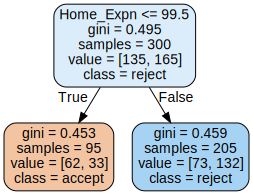

In [53]:
loan_dtree_data_2 = tree.export_graphviz(loan_dtree_clf_2, out_file=None, 
                                            feature_names=list(X_cols.columns), class_names=classes, 
                                            filled=True, rounded=True, impurity=True)  
loan_dtree_graph_2 = graphviz.Source(loan_dtree_data_2)  
loan_dtree_graph_2 

**Here we're getting a smaller decision tree

**Hence we found that with all columns intact we are getting better accuracy compare to when removing some columns based on the correlation coefficient and p-values for decision tree**

The results of this project will include visualizations of the decision trees and random forests, as well as a comparison of their performance metrics. Based on these results, recommendations will be made on the best approach for building a model to predict loan outcomes.